In [1]:
%matplotlib inline

import jax.numpy as jnp
from jax import value_and_grad
from jax import random
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import seaborn as snb
import numpy as np


from mpl_toolkits.axes_grid1 import make_axes_locatable

def add_colorbar(im, fig, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')


# we want to use 64 bit floating precision
import jax
jax.config.update("jax_enable_x64", True)

snb.set_style('darkgrid')
snb.set_theme(font_scale=1.25)


## Code for generating samples of f

In [2]:
def generate_samples(key, m, K, num_samples, jitter=0):
    """
        f_samples        -- a numpy matrix containing the samples of f (shape N x num_samples)
    """
    # generate samples from N(0, 1) of shape (N, num_samples)
    zs = random.normal(key, shape=(len(K), num_samples))

    K = K + jitter * jnp.eye(K.shape[0])

    L = jnp.linalg.cholesky(K)

    f_samples = L @ zs + m[:, None]

    # sanity check of dimensions
    assert f_samples.shape == (len(K), num_samples), f"The shape of f_samples appears wrong. Expected shape ({len(K)}, {num_samples}), but the actual shape was {f_samples.shape}. Please check your code. "
    return f_samples


# sanity check of implementation
key = random.PRNGKey(1)
num_samples = 100000
m = jnp.array([jnp.pi, jnp.sqrt(2)])
V = jnp.array([[0.123, -0.05], [-0.05, 0.123]])
f_samples = generate_samples(key, m, V, num_samples)
assert jnp.linalg.norm(jnp.mean(f_samples, 1)- m) < 1e-2, "The mean of f_samples appears wrong. Please check your code"
assert jnp.linalg.norm(jnp.cov(f_samples) - V) < 1e-2, "The covariance of f_samples appears wrong. Please check your code"

## Data

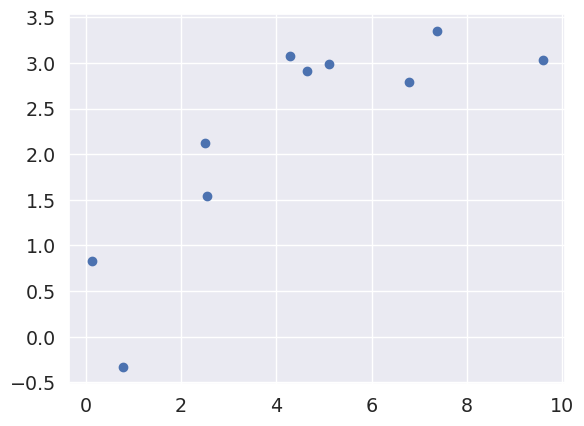

In [3]:
X = jnp.array([9.589, 7.375, 4.647, 2.501, 2.538, 6.783, 4.294, 5.111, 0.130, 0.783])
y = jnp.array([3.032, 3.349, 2.906, 2.126, 1.538, 2.787, 3.078, 2.993, 0.828, -0.331])

plt.scatter(X, y)

## Network

In [4]:
from network import SimpleNeuralNet, log_npdf
from loglike import NormalLikelihood

seed = 2
key = random.PRNGKey(seed)
key_X, key_y = random.split(key)

sigmoid = lambda x: 1./(1+jnp.exp(-x))
tau = 2
beta = 4

likelihood = NormalLikelihood(y = y, beta = 1/beta)

net = SimpleNeuralNet(X = X, y = y, tau = tau, activation_fun=sigmoid, alpha = 1/beta, likelihood=likelihood)

(100, 21)
(100, 2)
(100,)
(100, 1)
(21,)


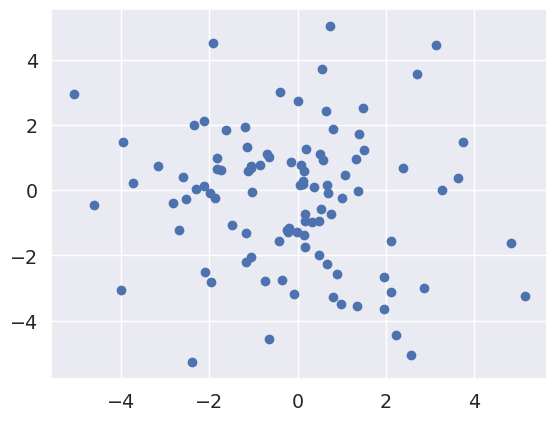

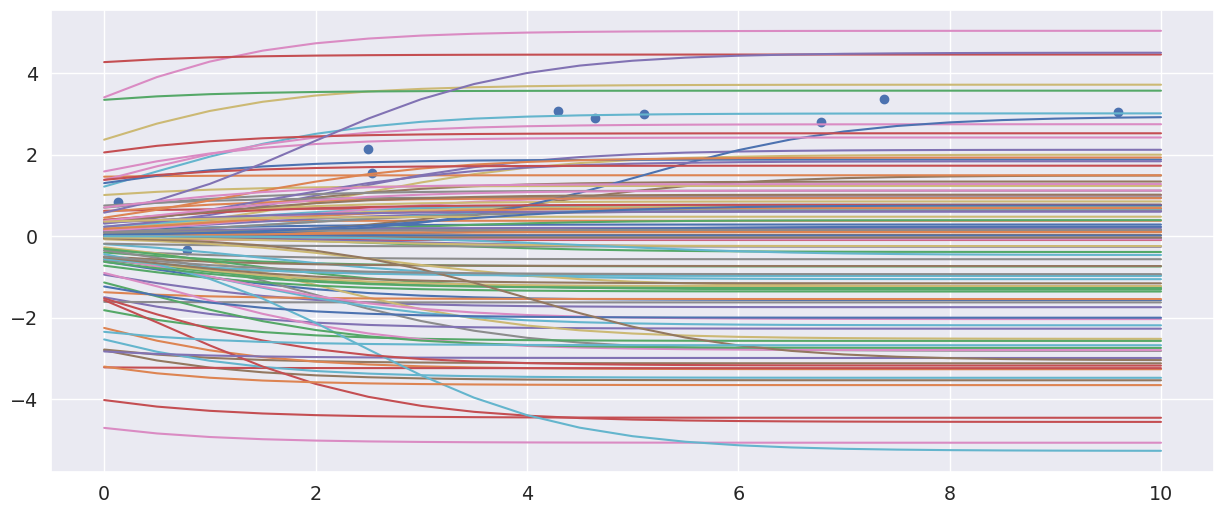

In [9]:

xmin = 0
xmax = 10
m = 21
n = 100
ws = net.sample_from_prior_weights(n = 100)
fs = net.sample_fs(ws = ws, xmin = 0, xmax = 10,  m = m)
xs = jnp.linspace(xmin, xmax, m)
plt.scatter(ws[:,0], ws[:,1])
# print(fs[0].shape)
print(xs.shape)
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
# plot_data(ax, X, y)
for i in range(n):
    ax.plot(xs, fs[i,:])
plt.scatter(X, y)
# ax.errorbar(X, gpc.m, yerr=1.96*jnp.sqrt(jnp.diag(gpc.S)), fmt='ko', label='Posterior mean and 95% interval for $f_n$', alpha=0.5)
# ax.legend();


# print(ws)

## 2.3


In [12]:
print(net.log_posterior(params=jnp.array([0,0])))

-44.45437288583651
